In [43]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

1


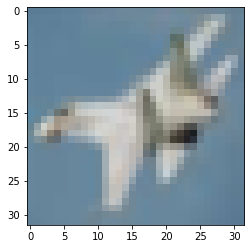

0


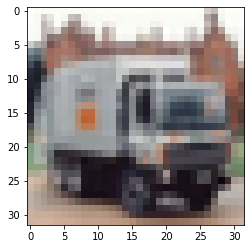

0


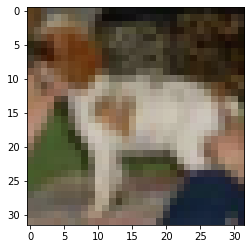

0


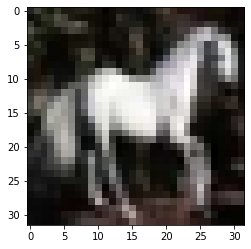

0


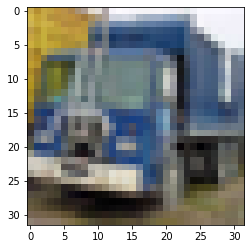

0


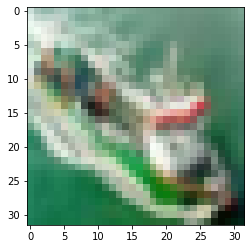

In [68]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(10,16):
    print(Y_test[i])
    plt.imshow(x_test[i])
    plt.show()

In [20]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

y_train=y_train.astype('int32')
y_test=y_test.astype('int32')

x_train=x_train/255.0
x_test=x_test/255.0

In [21]:
import numpy as np
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


def targets(target):
    tar=[]
    for i in range(len(target)):
        new=np.argmax(target[i])
        tar.append(new)
    return tar
        
Y_train=np.array(targets(y_train))
Y_test=np.array(targets(y_test))

In [26]:
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='uniform',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='uniform',padding='same',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu',kernel_constraint=max_norm(3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation='relu',kernel_constraint=max_norm(3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')           
])

adam=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.5,beta_2=0.599,decay=(0.01/25))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,Y_train,epochs=25,batch_size=10,validation_data=(x_test,Y_test))

Epoch 1/25
3645/5000 [====================>.........] - ETA: 6s - loss: 0.6561 - accuracy: 0.8120

KeyboardInterrupt: 

In [ ]:
def build_model(hp):
    model_new=tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=hp.Int('conv_1_filt',min_value=32,max_value=512,step=16),kernel_size=(2,2),activation='relu',input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(rate=hp.Float('Dropout_1',min_value=0.1,max_value=0.9,step=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=hp.Int('conv_1_filt',min_value=32,max_value=512,step=16),kernel_size=(2,2),activation='relu',input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(rate=hp.Float('Dropout_1',min_value=0.1,max_value=0.9,step=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=hp.Int('conv_1_filt',min_value=32,max_value=512,step=16),kernel_size=(2,2),activation='relu',input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(rate=hp.Float('Dropout_1',min_value=0.1,max_value=0.9,step=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=hp.Int('conv_1_filt',min_value=32,max_value=512,step=16),kernel_size=(2,2),activation='relu',input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(rate=hp.Float('Dropout_1',min_value=0.1,max_value=0.9,step=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=hp.Float('Dropout_1',min_value=0.1,max_value=0.9,step=0.1)),
        tf.keras.layers.Dense(units=hp.Int('dense_1',min_value=16,max_value=512,step=16),activation='relu',kernel_initializer='uniform',kernel_constraint=max_norm(3)),
        tf.keras.layers.Dropout(rate=hp.Float('Dropout_1',min_value=0.1,max_value=0.9,step=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(units=hp.Int('dense_2',min_value=16,max_value=512,step=16),activation='relu',kernel_initializer='uniform',kernel_constraint=max_norm(3)),
        tf.keras.layers.Dropout(rate=hp.Float('Dropout_2',min_value=0.1,max_value=0.9,step=0.1)),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(10,activation='softmax')])
    
    
    model_new.compile(optimizer=Adam(hp.Choice('learning_rate',values=[1e-2,1e-3]),beta_1=0.9,beta_2=0.9,decay=(0.01/25)),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    return model_new


tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name='Final')

In [ ]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5)

tuner_search.search(x_train,Y_train,epochs=4,validation_data=(x_test,Y_test))

In [ ]:
models=tuner_search.get_best_models(num_models=1)[0]
models.summary()

models.fit(x_train,Y_train,epochs=20,validation_data=(x_test,Y_test),initial_epoch=4)

In [22]:
def building_model(hp):
    models = Sequential()
    models.add(Conv2D(filters=hp.Int('conv_1_filt',min_value=32,max_value=512,step=16),kernel_size=(2,2),activation='relu',input_shape=(32,32,3))),
    #models.add(MaxPooling2D((2,2))),
    models.add(Dropout(rate=hp.Float('Dropout_1',min_value=0.1,max_value=0.9,step=0.1))),
    models.add(BatchNormalization())
    
    for i in range(hp.Int('num_layers', 2, 5)):
        models.add(Conv2D(filters=hp.Int('conv_filt'+str(i),min_value=32,max_value=512,step=16),kernel_size=(2,2),activation='relu')),
        #models.add(MaxPooling2D((2,2))),
        models.add(Dropout(rate=hp.Float('Dropout_'+str(i),min_value=0.1,max_value=0.9,step=0.1))),
        models.add(BatchNormalization())
        
    models.add(Flatten()),
    models.add(Dropout(rate=hp.Float('Dropout_flat',min_value=0.1,max_value=0.9,step=0.1)))
              
    
    for z in range(1,20):
        models.add(Dense(units=hp.Int('dense_'+str(z),min_value=16,max_value=512,step=16),activation='relu',kernel_initializer='uniform',kernel_constraint=max_norm(3))),
        models.add(Dropout(rate=hp.Float('Dropout__dense'+str(z),min_value=0.1,max_value=0.9,step=0.1))),
        models.add(BatchNormalization())
        
    
    models.add(layers.Dense(10,activation='softmax'))
              
  
    models.compile(optimizer=Adam(hp.Choice('learning_rate',values=[1e-2,1e-3]),beta_1=0.9,beta_2=0.9,decay=(0.01/25)),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    return models
        
tuner=RandomSearch(building_model,objective='val_accuracy',max_trials=5,directory='output',project_name='Models')   

tuner=RandomSearch(building_model,objective='val_accuracy',max_trials=5)

tuner.search(x_train,Y_train,epochs=4,validation_data=(x_test,Y_test))

Trial 5 Complete [00h 03m 38s]
val_accuracy: 0.8999999761581421

Best val_accuracy So Far: 0.8999999761581421
Total elapsed time: 00h 29m 47s


In [23]:
mode=tuner.get_best_models(num_models=1)[0]
mode.summary()

mode.fit(x_train,Y_train,epochs=8,validation_data=(x_test,Y_test),initial_epoch=4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 480)       6240      
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 480)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 480)       1920      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 496)       952816    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 496)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 496)       1984      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 320)       6

Epoch 5/8
1563/1563 [==============================] - 120s 73ms/step - loss: 0.3371 - accuracy: 0.8999 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 6/8
1563/1563 [==============================] - 115s 74ms/step - loss: 0.3246 - accuracy: 0.9018 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 7/8
1563/1563 [==============================] - 114s 73ms/step - loss: 0.3306 - accuracy: 0.8983 - val_loss: 0.4507 - val_accuracy: 0.9000
Epoch 8/8
1563/1563 [==============================] - 115s 73ms/step - loss: 0.3240 - accuracy: 0.9009 - val_loss: 1.6853 - val_accuracy: 0.9000


In [72]:
pred=mode.predict(x_test)
print(pred)
mode.evaluate(x_test,Y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 5s 17ms/step - loss: 254755.4531 - accuracy: 0.9000


[254755.453125, 0.8999999761581421]